<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Digital-Image-Processing/blob/main/Mathematical_Morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import imageio
import matplotlib.pyplot as plt
from skimage import morphology
import numpy as np

In [2]:
!wget https://github.com/maponti/imageprocessing_course_icmc/blob/master/images/morpho.png

--2021-10-03 10:02:47--  https://github.com/maponti/imageprocessing_course_icmc/blob/master/images/morpho.png
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘morpho.png’

morpho.png              [ <=>                ] 128.10K  --.-KB/s    in 0.009s  

2021-10-03 10:02:47 (13.8 MB/s) - ‘morpho.png’ saved [131179]



In [3]:
morphology.disk(2)

array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

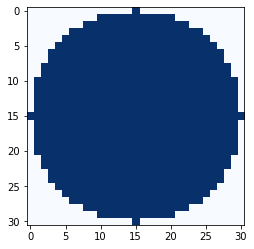

In [4]:
plt.imshow(morphology.disk(15),cmap="Blues")

In [5]:
from skimage.morphology import (square,disk,rectangle,disk,star,diamond)

In [6]:
diamond(3)

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [7]:
disk(3)

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [8]:
struc_elem_2d=[square(7),rectangle(7,11),diamond(7),disk(7),star(7)]

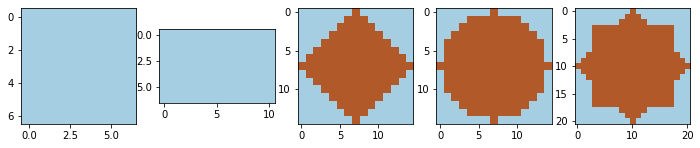

In [9]:
fig=plt.figure(figsize=(12,6))
i=1
for struc in struc_elem_2d:
  plt.subplot(1,5,i)
  plt.imshow(struc,cmap="Paired")
  i+=1

New structuring element

In [10]:
my_struc=np.zeros([9,9])
my_struc[3:6,:]=1
my_struc[:,3:6]=1
my_struc

array([[0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0.]])

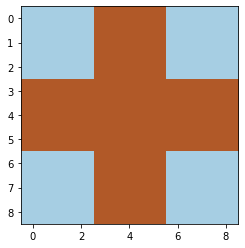

In [11]:
plt.imshow(my_struc,cmap="Paired")

In [12]:
!wget https://www.crictracker.com/wp-content/uploads/2021/04/Rishabh-Pant-3.jpg

--2021-10-03 10:02:49--  https://www.crictracker.com/wp-content/uploads/2021/04/Rishabh-Pant-3.jpg
Resolving www.crictracker.com (www.crictracker.com)... 172.64.111.22, 172.64.110.22, 2606:4700:e0::ac40:6e16, ...
Connecting to www.crictracker.com (www.crictracker.com)|172.64.111.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 192491 (188K) [image/jpeg]
Saving to: ‘Rishabh-Pant-3.jpg’

Rishabh-Pant-3.jpg  100%[===================>] 187.98K  --.-KB/s    in 0.02s   

2021-10-03 10:02:49 (8.43 MB/s) - ‘Rishabh-Pant-3.jpg’ saved [192491/192491]



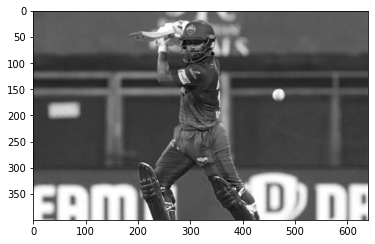

In [13]:
imgbin=imageio.imread("Rishabh-Pant-3.jpg")
imgbin=imgbin[:,:,1]
imgbin=255*(imgbin/np.max(imgbin))
plt.imshow(imgbin,cmap="gray")

In [14]:
imgbin

Array([[ 92.,  92.,  92., ..., 102., 103., 103.],
       [ 92.,  92.,  92., ..., 100., 102., 102.],
       [ 92.,  92.,  92., ..., 100., 102., 101.],
       ...,
       [248., 251., 253., ..., 173., 193., 210.],
       [248., 252., 253., ..., 174., 194., 210.],
       [248., 251., 252., ..., 175., 194., 210.]])

In [15]:
for i in range(imgbin.shape[0]):
  for j in range(imgbin.shape[1]):
    if imgbin[i][j]<150:
      imgbin[i][j]=0
    else:
      imgbin[i][j]=255

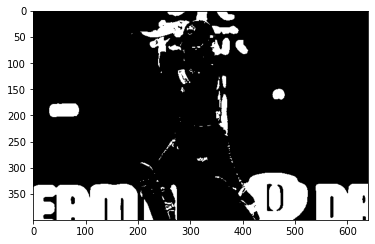

In [16]:
plt.imshow(imgbin,cmap="gray")

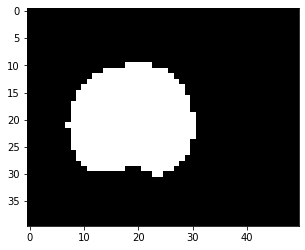

In [17]:
plt.imshow(imgbin[140:180,450:500],cmap="gray")

#Erosion

In [18]:
img_er1=morphology.binary_erosion(imgbin,morphology.disk(1)).astype(np.uint8)
img_er2=morphology.binary_erosion(imgbin,morphology.disk(7)).astype(np.uint8)
img_er3=morphology.binary_erosion(imgbin,morphology.disk(25)).astype(np.uint8)

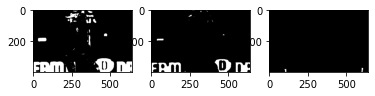

In [19]:
plt.subplot(1,3,1)
plt.imshow(img_er1,cmap="gray")
plt.subplot(1,3,2)
plt.imshow(img_er2,cmap="gray")
plt.subplot(1,3,3)
plt.imshow(img_er3,cmap="gray")
plt.show()

#Dialation

In [21]:
img_dia1=morphology.binary_dilation(imgbin,morphology.disk(10)).astype(np.uint8)
img_dia2=morphology.binary_dilation(imgbin,morphology.disk(5)).astype(np.uint8)

Text(0.5, 1.0, 'dilation with disk 5')

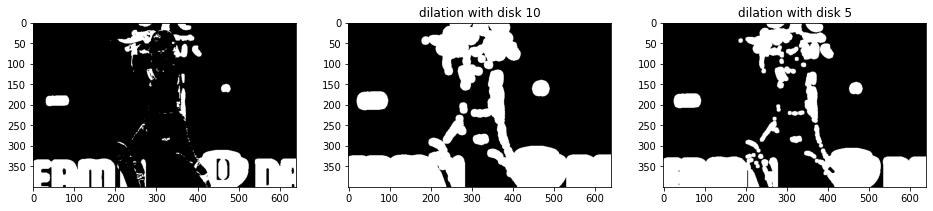

In [23]:
fig = plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1); plt.imshow(imgbin, cmap="gray")
plt.subplot(1, 3, 2); plt.imshow(img_dia1, cmap="gray"); plt.title("dilation with disk 10")
plt.subplot(1, 3, 3); plt.imshow(img_dia2, cmap="gray"); plt.title("dilation with disk 5")